In [1]:
import itk
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import zoom
import tifffile as tif
import pandas as pd
import os

In [2]:
fx = itk.imread('/home/dennislab2/Downloads/mPRA.tif',pixel_type=itk.US)
mv = itk.imread('/home/dennislab2/Downloads/WHS_masked_atlas.tif',pixel_type=itk.US)
mv2= itk.imread('/home/dennislab2/Downloads/WHS_masked_anns.tif',pixel_type=itk.US)

TIFFReadDirectory: Warning, Unknown field with tag 50838 (0xc696) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 50839 (0xc697) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 50838 (0xc696) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 50839 (0xc697) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 50838 (0xc696) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 50839 (0xc697) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 50838 (0xc696) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 50839 (0xc697) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 50838 (0xc696) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 50839 (0xc697) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 50838 (0xc696) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 50839 (0xc697) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 5

In [20]:
output_directory='/home/dennislab2/Desktop/test'
if not os.path.isdir(output_directory):
    os.mkdir(output_directory)

In [4]:
parameter_object=itk.ParameterObject.New()
resolutions=8
# make maps
parameter_map_affine = parameter_object.GetDefaultParameterMap('affine',resolutions)
parameter_map_affine['Metric'] = ['AdvancedMattesMutualInformation']
parameter_map_affine['NumberOfHistogramBins']=['32']
parameter_map_affine['MaximumNumberOfIterations']=['2500']
parameter_map_affine['NumberOfSpatialSamples']=['4000']
parameter_map_affine['Optimizer']=['AdaptiveStochasticGradientDescent']
parameter_map_affine['Interpolator']=['BSplineInterpolator']
parameter_map_affine['UseDirectionCosines']=['false']

parameter_map_bspline = parameter_object.GetDefaultParameterMap('bspline',resolutions)
parameter_map_bspline['Metric'] = ['AdvancedMattesMutualInformation']
parameter_map_bspline['NumberOfHistogramBins']=['32']
parameter_map_bspline['MaximumNumberOfIterations']=['15000']
parameter_map_bspline['NumberOfSpatialSamples']=['10000']
parameter_map_bspline['Optimizer']=['StandardGradientDescent']
parameter_map_bspline['Interpolator']=['BSplineInterpolator']
parameter_map_bspline['UseDirectionCosines']=['false']

# add maps
parameter_object.AddParameterMap(parameter_map_affine)
parameter_object.AddParameterMap(parameter_map_bspline)
parameter_object.AddParameterMap(parameter_map_bspline)
parameter_object.AddParameterMap(parameter_map_bspline)


#set things for all maps
parameter_object.SetParameter('FinalBSplineInterpolationOrder',"0")
parameter_object.SetParameter("DefaultPixelValue", "0")

In [23]:
parameter_object=itk.ParameterObject.New()
parameter_object.AddParameterFile('/home/dennislab2/Desktop/GitHub/cleared_brains/new_param_folder/Order1_Par0000affine.txt')
parameter_object.AddParameterFile('/home/dennislab2/Desktop/GitHub/cleared_brains/new_param_folder/Order3_Par0000bspline.txt')
parameter_object.AddParameterFile('/home/dennislab2/Desktop/GitHub/cleared_brains/new_param_folder/Order3_Par0000bspline.txt')
parameter_object.AddParameterFile('/home/dennislab2/Desktop/GitHub/cleared_brains/new_param_folder/Order3_Par0000bspline.txt')

In [24]:
result_img_elx, result_transform_params = itk.elastix_registration_method(fx,mv,parameter_object,log_to_file=False,output_directory=output_directory)

In [ ]:
plt.imshow(mv[:,:,100])

In [ ]:
plt.imshow(fx[:,:,100])

In [ ]:
plt.imshow(result_img_elx[:,:,100])

In [13]:
tif.imsave(os.path.join(output_directory,'whstompra.tif'),np.asarray(result_img_elx).astype(np.float32))

## transformix another image

In [14]:
result_image_transformix = itk.transformix_filter(mv2,result_transform_params)

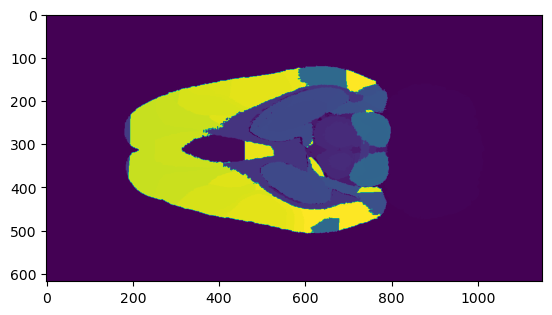

In [15]:
plt.imshow(result_image_transformix[:,:,100])
tif.imsave(os.path.join(output_directory,'whsannsinmpra.tif'),np.asarray(result_image_transformix).astype(np.float32))

In [ ]:
plt.imshow(result_image_transformix[x,:,:])
x+=20

# transformix points

In [11]:
itk.transformix_pointset

<function itk.ElastixPython.transformix_pointset(*args, **kwargs)>

In [12]:
pts = [100,100,100]

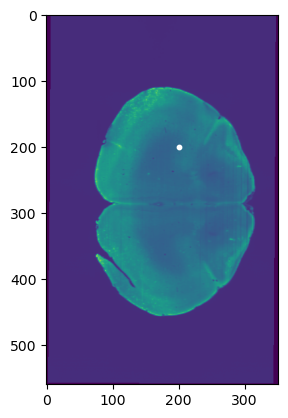

In [58]:
aval=100
bval=200
val=bval
plt.imshow(fx[:,:,val])#,clim=(0,300))
plt.scatter(val,val,s=10,c='w')

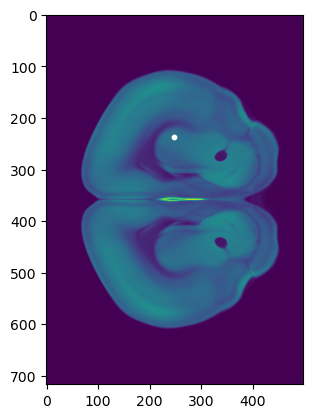

In [55]:
c=b
plt.imshow(mv_140[:,:,c[2]])
plt.scatter(c[0],c[1],s=10,c='w')

In [47]:
print(np.shape(fx))
print(np.shape(mv_140))

(560, 351, 679)
(717, 498, 897)


In [50]:
a=[136,105,136]
b=[247,237,272]

In [ ]:
#result_transform_params=
resultimg, result_transform_parameters = itk.elastix_registration_method(fx,mv_140,initial_transform_parameter_file_name='/home/dennislab2/Desktop/2024-02-01_141816/TransformParameters.3.txt')

In [ ]:
result_transform_parameters

In [6]:
itk.transformix_pointset(mv_140,initial_transform_parameter_file_name='/home/dennislab2/Desktop/2024-02-01_141816/TransformParameters.3.txt',fixed_point_set_file_name='/home/dennislab2/Desktop/testptset.txt',output_directory="/home/dennislab2/Desktop")

AttributeError: 'itkTransformixFilterIUS3' object has no attribute 'SetInitialTransformParameterFileName'

In [7]:
parameterMap0 = itk.ParameterObject#("/home/dennislab2/Desktop/2024-02-01_141816/allen_to_2024-02-01/TransformParameters.0.txt")

In [24]:
tst=itk.ParameterObject.New()
tst.AddParameterFile("/home/dennislab2/Desktop/2024-02-01_141816/allen_to_2024-02-01/TransformParameters.0.txt")
tst.AddParameterFile

In [4]:
i=0
print(i)

0


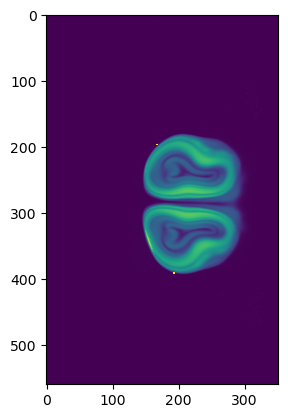

In [63]:
parameterMap1 = sitk.ReadParameterFile("/path/to/TransformParameters.1.txt`)
transformixImageFilter.SetParameterMap(parameterMap0)
transformixImageFilter.AddParameterMap(parameterMap1)

In [ ]:
# for each file, get all the points
# adjust them by the adjusted file info 
# downsample: 
    # reset xyz to be x=max cmy-cmy, y=cmz, z=cmx
    #I think divide by 884
#final vol is 678x 350y 560z


In [73]:
offsets = pd.read_csv('/home/dennislab2/Desktop/2024-02-01_141816/2024-02-01_offsets.csv',header=None)
offsets.columns=['view','x','y','z']
offsets.x=offsets.x*-1
offsets.y=offsets.y*-1
offsets.z=offsets.z*-1
offsets
# this makes 0,0 to 2048,2048 for all points WITHIN THEIR VOLS

,view,x,y,z
0,0,-1303.285304,4152.512885,2056.183950
1,1,242.179259,4133.229548,2048.359441
2,2,1785.181886,4117.636255,2046.239225
3,3,3326.343198,4092.006744,2058.219036
4,4,-1305.175593,2644.778095,2062.647370
5,5,244.209291,2626.043520,2060.806305
6,6,1787.779314,2609.559367,2063.768499
7,7,3332.813061,2590.671257,2075.030627
8,8,-1304.893456,1133.489608,2070.502650
9,9,243.755624,1115.842248,2073.316999


In [70]:
# full volume space is 8192
offsets.x+=[6144,4096,2048,0]*3

In [72]:
offsets.y+=[0,0,0,0,2048,2048,2048,2048,4096,4096,4096,4096]#,6144,6144,6144,6144]#,8192,8192,8192,8192]

In [56]:
offsets # now in full  space

,view,x,y,z
0,0,4840.714696,4152.512885,2056.183950
1,1,4338.179259,4133.229548,2048.359441
2,2,3833.181886,4117.636255,2046.239225
3,3,3326.343198,4092.006744,2058.219036
4,4,4838.824407,4692.778095,2062.647370
5,5,4340.209291,4674.043520,2060.806305
6,6,3835.779314,4657.559367,2063.768499
7,7,3332.813061,4638.671257,2075.030627
8,8,4839.106544,5229.489608,2070.502650
9,9,4339.755624,5211.842248,2073.316999


In [74]:
cmzadj5=356/1999
cmxadj5=512/(2048*4)
cmyadj5=641/(2048*5)
cmzadj=351/1999
cmxadj=560/(2048*4)
cmyadj=679/(2048*5)

In [ ]:
# divide by cmyoldadj

In [75]:
listofss=['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19']
[i for i in np.arange(len(listofss))]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [76]:
for i in np.arange(0,len(listofss)):
    data = pd.read_csv('/home/dennislab2/Desktop/2024-02-01_141816/s{}_test.csv'.format(listofss[i]),header=None)
    data.columns=['cmx','cmy','cmz']
    offset_subdf=offsets[offsets.index==i]
    data.cmx+=float(offsets[offsets.view==i].x)
    data.cmx=data.cmx*cmxadj
    data.cmy+=float(offsets[offsets.view==i].y)
    data.cmy=data.cmy*cmyadj
    data.cmz+=float(offsets[offsets.view==i].z)
    data.cmz=data.cmz*cmzadj
    data.to_csv('/home/dennislab2/Desktop/2024-02-01_141816/s{}_adj_indownsampled.csv'.format(listofss[i]),header=None,index=None)
    print('done with {}, num {}'.format(listofss[i],i))

done with 00, num 0
done with 01, num 1
done with 02, num 2
done with 03, num 3
done with 04, num 4
done with 05, num 5
done with 06, num 6
done with 07, num 7
done with 08, num 8
done with 09, num 9
done with 10, num 10
done with 11, num 11
done with 12, num 12
done with 13, num 13
done with 14, num 14
done with 15, num 15
done with 16, num 16
done with 17, num 17
done with 18, num 18
done with 19, num 19


In [ ]:
# now we have points in 20 files that have cm2 points in downsampled tiff space
# next we need to swap axes in a smart way
# then transformix points
# then divide by 1.4
# then get floats!
# later go back and do cm2 on 12-19 for 2024-05 brain

In [ ]:
# to format for transformix, need things to go from x,y,z to 
# header = point
# number of points
# all the points, each set of 3 on a line, sep by space not comma

In [78]:
import time


In [79]:
time.sleep(20)

KeyboardInterrupt: 

In [44]:
data # in downsampled, now flip axes
data['reslicex']=679-data.ty
data['reslicey']=data.tz
data['reslicez']=data.tx
data[['reslicex','reslicey','reslicez']]

In [77]:
for val in listofss:
    df=pd.DataFrame([['point','',''],[str(0),'','']],columns=['reslicex','reslicey','reslicez'])
    data = pd.read_csv('/home/dennislab2/Desktop/2024-02-01_141816/s{}_adj_indownsampled.csv'.format(val),header=None)
    data.columns=['tx','ty','tz']
    data['reslicex']=649-data.ty
    data['reslicey']=data.tz
    data['reslicez']=data.tx
    data=data[['reslicex','reslicey','reslicez']]
    df = pd.concat([df,data]).reset_index(drop=True)
    df.reslicex[1]=str(len(data))
    df.to_csv('/home/dennislab2/Desktop/2024-02-01_141816/2024-02-01_points_s{}.txt'.format(val),sep=' ',header=None,index=None)

In [82]:
cells = np.load('/home/dennislab2/Desktop/2024-02-01_cells_at19.npy')

In [85]:
np.max(cells)

35.0

In [84]:
tif.imsave('/home/dennislab2/Desktop/2024-02-01_cells_at19.tif',cells)

In [66]:
tst = pd.read_csv('/home/dennislab2/Desktop/2024-02-01_141816/points_01.csv')
tst

,Unnamed: 0,x,y,z
0,0,524,12,260
1,1,602,22,331
2,2,499,21,291
3,3,499,21,291
4,4,500,21,291
...,...,...,...,...
1451120,1451120,442,644,373
1451121,1451121,453,648,284
1451122,1451122,457,649,292
1451123,1451123,459,651,290


In [ ]:
# need result_transform_params

In [62]:
for sval in listofss:
    print(sval)
    x=itk.transformix_pointset(mv_140,result_transform_params,fixed_point_set_file_name='/home/dennislab2/Desktop/2024-02-01_points_s{}.txt'.format(sval),output_directory="/home/dennislab2/Desktop/2024-02-01_141816")
    dfx=pd.DataFrame(x)
    dfx.columns = dfx.columns.astype(str)
    dfx = dfx[['46','47','48']]
    dfx.columns=['x','y','z']
    dfx.x=round(dfx.x.astype(int)/1.4).astype(int)
    dfx.y=round(dfx.y.astype(int)/1.4).astype(int)
    dfx.z=round(dfx.z.astype(int)/1.4).astype(int)
    dfx.to_csv('/home/dennislab2/Desktop/2024-02-01_141816/points_{}.csv'.format(sval))


00


NameError: name 'result_transform_params' is not defined

In [40]:
for val in listofss:
    df=pd.DataFrame([['point','',''],[str(0),'','']],columns=['tx','ty','tz'])
    data = pd.read_csv('/home/dennislab2/Desktop/2024-05-13_134/s{}_adj_indownsampled_AGAIN.csv'.format(val),header=None)
    data.columns=['tx','ty','tz']
    df = pd.concat([df,data]).reset_index(drop=True)
    df.tx[1]=str(len(data))
    df.to_csv('/home/dennislab2/Desktop/2024-05-13_134/2024-05-13_points_s{}.txt'.format(val),sep=' ',header=None,index=None)

FileNotFoundError: [Errno 2] No such file or directory: '/home/dennislab2/Desktop/2024-05-13_134/s12_adj_indownsampled_AGAIN.csv'

In [182]:
listofss[0:12]

['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11']

In [170]:
dft = pd.DataFrame([[1,1,1],[2,2,2],[3,3,3]])
dft

,0,1,2
0,1,1,1
1,2,2,2
2,3,3,3


In [180]:
dft.columns=['tx','ty','tz']
dfnew=pd.concat([df,dft]).reset_index(drop=True)
dfnew.tx[1]=str(total_len)

'0'

In [168]:
df.to_csv('/home/dennislab2/Desktop/test.csv',sep=' ')

In [4]:
itk.

In [ ]:
itk.Tr

In [ ]:
test=itk.

In [26]:
itk.transformread('/home/dennislab2/Desktop/2024-02-01_141816/allen_to_2024-02-01/TransformParameters.3.txt')

RuntimeError: /work/ITK-source/ITK/Modules/IO/TransformInsightLegacy/src/itkTxtTransformIO.cxx:160:
ITK ERROR: TxtTransformIOTemplate(0x55629c03dcd0): Tags must be delimited by :

In [14]:
print('k')

k


In [15]:
points = itk.transformix_pointset(mv,result_transform_params,fixed_point_set_file_name='/home/dennislab2/Desktop/2024-02-01/2024-02-01_points_s0.txt',output_directory="/home/dennislab2/Desktop")

In [17]:
np.shape(mv)

(320, 528, 456)

In [19]:
cells=np.zeros(np.shape(mv))
for sval in np.arange(0,20):
    print(sval)
    #transformed_coords=itk.transformix_pointset(mv_140,transform_to_apply,fixed_point_set_file_name='/home/dennislab2/Desktop/2024-02-01/2024-02-01_points_s{}.txt'.format(sval),output_directory="/home/dennislab2/Desktop/2024-02-01")
    dfx=pd.DataFrame(points)
    dfx.columns = dfx.columns.astype(str)
    dfx = dfx[['46','47','48']]
    dfx.columns=['x','y','z']
    dfx.x=dfx.x.astype(int)
    dfx.y=dfx.y.astype(int)
    dfx.z=dfx.z.astype(int)
    dfx.to_csv('/home/dennislab2/Desktop/2024-02-01/points_{}.csv'.format(sval))
    for idx in dfx.index:
        x,y,z=[dfx.x[idx],dfx.y[idx],dfx.z[idx]]
        if (x<320) and (y<528) and (z<456):
            cells[x,y,z]+=1
    np.save('/home/dennislab2/Desktop/2024-02-01_cells_at{}.npy'.format(sval),cells)


0
1
2


KeyboardInterrupt: 

In [20]:
tif.imsave('/home/dennislab2/Desktop/2024-02-01_cells_at0.tif',cells)

In [ ]:
itk.transformix_pointset(mv_140,result_transform_params,fixed_point_set_file_name='/home/dennislab2/Desktop/2024-05-13_134_points.txt',output_directory="/home/dennislab2/Desktop/2024-05-13_134")

In [33]:
test=itk.ParameterObject.New()

In [34]:
test.AddParameterFile('/home/dennislab2/Desktop/allen_to_2024-05/TransformParameters.0.txt')

In [36]:
test.AddParameterFile('/home/dennislab2/Desktop/allen_to_2024-05/TransformParameters.1.txt')
test.AddParameterFile('/home/dennislab2/Desktop/allen_to_2024-05/TransformParameters.2.txt')
test.AddParameterFile('/home/dennislab2/Desktop/allen_to_2024-05/TransformParameters.3.txt')

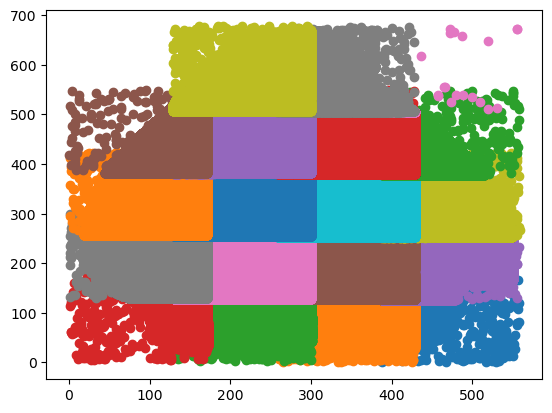

In [25]:
for sval in np.arange(0,19):
    df = pd.read_csv('/home/dennislab2/Desktop/2024-02-01/2024-02-01_points_s{}.txt'.format(sval),sep=' ',header=None,skiprows=[0,1])
    df.columns=['x','y','z']
    plt.scatter(df.x,df.y)

In [26]:
cells=np.zeros(np.shape(mv_140))
for sval in np.arange(0,20):
    print(sval)
    transformed_coords=itk.transformix_pointset(mv_140,transform_to_apply,fixed_point_set_file_name='/home/dennislab2/Desktop/2024-02-01/2024-02-01_points_s{}.txt'.format(sval),output_directory="/home/dennislab2/Desktop/2024-02-01")
    dfx=pd.DataFrame(transformed_coords)
    dfx.columns = dfx.columns.astype(str)
    dfx = dfx[['46','47','48']]
    dfx.columns=['x','y','z']
    dfx.x=round(dfx.x.astype(int)/1.4).astype(int)
    dfx.y=round(dfx.y.astype(int)/1.4).astype(int)
    dfx.z=round(dfx.z.astype(int)/1.4).astype(int)
    dfx.to_csv('/home/dennislab2/Desktop/2024-02-01/points_{}.csv'.format(sval))
    for idx in dfx.index:
        x,y,z=[dfx.x[idx],dfx.y[idx],dfx.z[idx]]
        if (x<491) and (y<951) and (z<784):
            cells[x,y,z]+=1
    np.save('/home/dennislab2/Desktop/2024-02-01_cells_at{}.npy'.format(sval),cells)


array([['Point', '0', ';', ..., '-27', '46', ']'],
       ['Point', '1', ';', ..., '125', '44', ']'],
       ['Point', '2', ';', ..., '122', '46', ']'],
       ...,
       ['Point', '656901', ';', ..., '90', '272', ']'],
       ['Point', '656902', ';', ..., '20', '299', ']'],
       ['Point', '656903', ';', ..., '21', '298', ']']], dtype='<U17')